## 오피넷 유가정보를 이용한 분석
- 브랜드별 유류비 분석(어느 브랜드가 저렴한 가격으로 공급하고 있는가?)
- 셀프/주유원 주유에 따른 분석(셀프 주유소가 일반 주유소보다 가격이 저렴한가?)
- 지역별로 유류비 가격 분석

## 1. 데이터 불러오기 및 데이터 정리
- 크롤링 진행
- 하나의 데이터로 만들기

In [1]:
import pandas as pd
from glob import glob

locFiles=glob('C:/pydata/oildata/지역_위치별*.xls')
locFiles

['C:/pydata/oildata\\지역_위치별(주유소) (1).xls',
 'C:/pydata/oildata\\지역_위치별(주유소) (10).xls',
 'C:/pydata/oildata\\지역_위치별(주유소) (11).xls',
 'C:/pydata/oildata\\지역_위치별(주유소) (12).xls',
 'C:/pydata/oildata\\지역_위치별(주유소) (13).xls',
 'C:/pydata/oildata\\지역_위치별(주유소) (14).xls',
 'C:/pydata/oildata\\지역_위치별(주유소) (15).xls',
 'C:/pydata/oildata\\지역_위치별(주유소) (16).xls',
 'C:/pydata/oildata\\지역_위치별(주유소) (17).xls',
 'C:/pydata/oildata\\지역_위치별(주유소) (18).xls',
 'C:/pydata/oildata\\지역_위치별(주유소) (19).xls',
 'C:/pydata/oildata\\지역_위치별(주유소) (2).xls',
 'C:/pydata/oildata\\지역_위치별(주유소) (20).xls',
 'C:/pydata/oildata\\지역_위치별(주유소) (21).xls',
 'C:/pydata/oildata\\지역_위치별(주유소) (22).xls',
 'C:/pydata/oildata\\지역_위치별(주유소) (23).xls',
 'C:/pydata/oildata\\지역_위치별(주유소) (24).xls',
 'C:/pydata/oildata\\지역_위치별(주유소) (25).xls',
 'C:/pydata/oildata\\지역_위치별(주유소) (26).xls',
 'C:/pydata/oildata\\지역_위치별(주유소) (27).xls',
 'C:/pydata/oildata\\지역_위치별(주유소) (28).xls',
 'C:/pydata/oildata\\지역_위치별(주유소) (29).xls',
 'C:/pydata/oildata\\지역_위치별(주유소) (

In [3]:
!pip install xlrd

In [7]:
# 엑셀 데이터를 일괄 tmp_df에 넣어주고 이후 pd.concat()를 이용해 열 이름을 기준으로 행추가
tmp_df = []
for file in locFiles:
    tmp = pd.read_excel(file, header=2)   # 위쪽 불필요한 데이터를 팬 3번째 데이터부터 가져오기
    tmp_df.append(tmp)

df = pd.concat(tmp_df, ignore_index=True) # 리스트에 저장한 데이터 열 추가(index 재설정 옵션)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      1344 non-null   object
 1   상호      1344 non-null   object
 2   주소      1344 non-null   object
 3   상표      1344 non-null   object
 4   전화번호    1344 non-null   object
 5   셀프여부    1344 non-null   object
 6   고급휘발유   1344 non-null   object
 7   휘발유     1344 non-null   object
 8   경유      1344 non-null   object
 9   실내등유    1344 non-null   object
dtypes: object(10)
memory usage: 105.1+ KB
None


In [8]:
display(df.head(3))
display(df.tail(3))

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1979,1913,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1993,1927,-
2,서울특별시,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,2165,2015,1925,1480


,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
1341,서울특별시,삼성주유소,서울 강남구 삼성로 521 (삼성동),SK에너지,02-538-0809,N,-,-,-,-
1342,서울특별시,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),SK에너지,02-542-6726,N,-,-,-,-
1343,서울특별시,경원주유소,서울 강남구 도산대로 428 (청담동),S-OIL,02-517-1957,N,-,-,-,-


In [9]:
df.columns

Index(['지역', '상호', '주소', '상표', '전화번호', '셀프여부', '고급휘발유', '휘발유', '경유', '실내등유'], dtype='object')

In [10]:
df_oil = df[['지역', '상호', '주소', '휘발유', '셀프여부', '상표' ]]  # 데이터 가져오기
df_oil.columns=['시도', '상호', '주소', '가격', '셀프', '상표']       # 이름 변경하기
df_oil.head(3)

# df_oil = df.iloc[:, [0, 1, 2, 6, 5, 3]]
# df_oil.columns=['시도', '상호', '주소', '가격', '셀프', '상표']

,시도,상호,주소,가격,셀프,상표
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1979,Y,현대오일뱅크
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),1993,N,현대오일뱅크
2,서울특별시,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),2015,N,GS칼텍스


In [15]:
## 주소를 이용해 시군구 추가
# 스페이스바를 기준으로 문자열을 자르고 결과에서 1번째 데이터 가져와 리트에 추가

df_oil['시군구']= [ addr.split()[1] for addr in df_oil['주소']]
df_oil['시군구'].unique()

C:\Users\user01\AppData\Local\Temp/ipykernel_11420/4183987034.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oil['시군구']= [ addr.split()[1] for addr in df_oil['주소']]


array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구',
       '수영구', '연제구', '영도구', '관악구', '해운대구', '광산구', '대덕구', '유성구', '광진구',
       '광역시', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [20]:
df_oil[df_oil["시도"].str.contains("대전")]   # contains()에 입력한 데이터가 포함된 자료 검색 

,시도,상호,주소,가격,셀프,상표,시군구
1002,대전광역시,일등주유소,대전 대덕구 신탄진로 636 (평촌동),1933,N,자가상표,대덕구
1003,대전광역시,㈜에스에이치에너지 영풍주유소,대전 대덕구 신탄진로 584 (상서동),1933,Y,현대오일뱅크,대덕구
1004,대전광역시,동대전셀프주유소,대전 대덕구 신탄진로 60 (연축동),1935,Y,현대오일뱅크,대덕구
1005,대전광역시,쌍용주유소,대전 대덕구 신탄진로 83 (연축동),1935,Y,알뜰주유소,대덕구
1006,대전광역시,신탄진(상)주유소/충전소,대전 대덕구 산업단지로 27,1938,Y,알뜰(ex),대덕구
...,...,...,...,...,...,...,...
1240,대전광역시,삼육주유소,대전 중구 대전천서로 757 (중촌동),2035,Y,SK에너지,중구
1241,대전광역시,안영IC주유소,대전 중구 대둔산로 188 (안영동),2065,Y,GS칼텍스,중구
1242,대전광역시,(주)이선 오월드주유소,대전 중구 대둔산로 359 (사정동),2069,Y,S-OIL,중구
1243,대전광역시,영광주유소,대전 중구 문화로 95 (유천동),2119,N,SK에너지,중구


In [23]:
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')  # 경고메세지 활성화

In [21]:
# 시군구 값이 '광역시'인 데이터 확인
df_oil[df_oil['시군구']=='광역시']

,시도,상호,주소,가격,셀프,상표,시군구
1212,대전광역시,도서관주유소,대전 광역시 중구 보문산로 353,1962,Y,현대오일뱅크,광역시


In [24]:
# 시군구 값이 '광역시'인 데이터를 중구로 변경
df_oil.loc[df_oil['시군구']=='광역시', '시군구'] ='중구'
df_oil['시군구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구',
       '수영구', '연제구', '영도구', '관악구', '해운대구', '광산구', '대덕구', '유성구', '광진구',
       '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [27]:
# 가격이 "-" 로 입력된 데이터 제거
df_oil=df_oil[df_oil['가격'] != "-"]

display(df_oil[df_oil['가격'] == "-"] ) # - 가 포함된 데이터가 있는지 확인

,시도,상호,주소,가격,셀프,상표,시군구


In [29]:
## 데이터 타입 확인
df_oil.dtypes

시도     object
상호     object
주소     object
가격     object
셀프     object
상표     object
시군구    object
dtype: object

In [30]:
# 가격 필드의 데이터 타입을 int로 변경(for문)
df_oil['가격'] = [ int(val)  for val in df_oil['가격']]

# df_oil=df_oil['가격'].astype({'가격':int})  # 함수사용

print(df_oil.dtypes)

시도     object
상호     object
주소     object
가격      int64
셀프     object
상표     object
시군구    object
dtype: object


In [31]:
## 데이터에 NaN 값이 있는지 확인
df_oil.isna().sum()

시도     0
상호     0
주소     0
가격     0
셀프     0
상표     0
시군구    0
dtype: int64

## 2. 데이터 분석하기
- 셀프 주유소가 일반 주유소보다 저렴한지 확인
- boxplot으로 확인

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform
from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    rc('font', family='AppleGothic')
    
elif platform.system() == "Windows":
    fontname=font_manager.FontProperties(fname="C:/Windows/Fonts/gulim.ttc").get_name()
    rc('font', family = fontname)
    
else:
    print('시스템 포트 설정 오류~~')

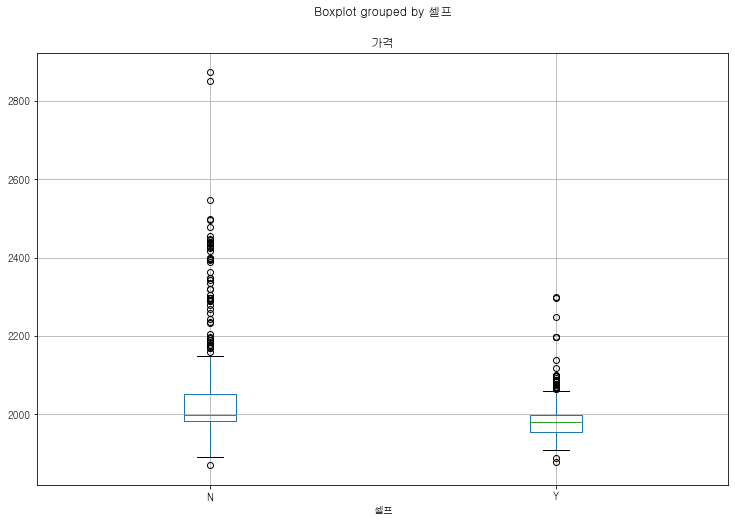

In [42]:
# 가격에 대한 셀프여부에 따라 boxplot
# 보는 방법 참조: https://codedragon.tistory.com/7012

df_oil.boxplot(column='가격', by='셀프', figsize=(12, 8))
plt.show()

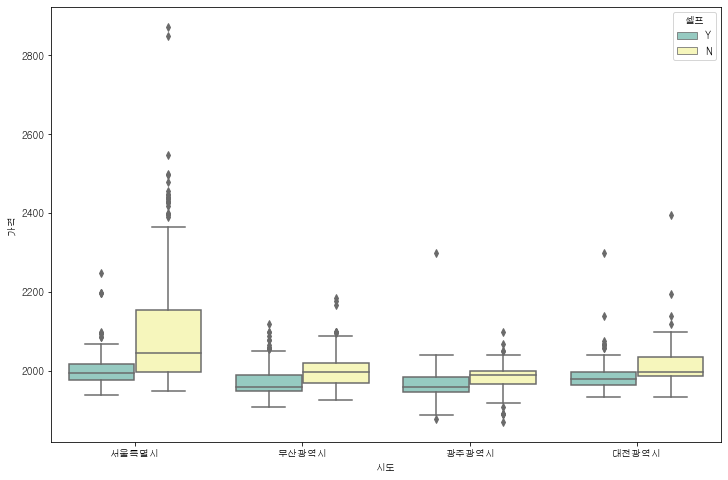

In [44]:
# 시도별/seaborn.boxplot 사용
plt.figure(figsize=(12, 8))
sns.boxplot(x='시도', y='가격', hue='셀프', data=df_oil, palette='Set3')
plt.show()

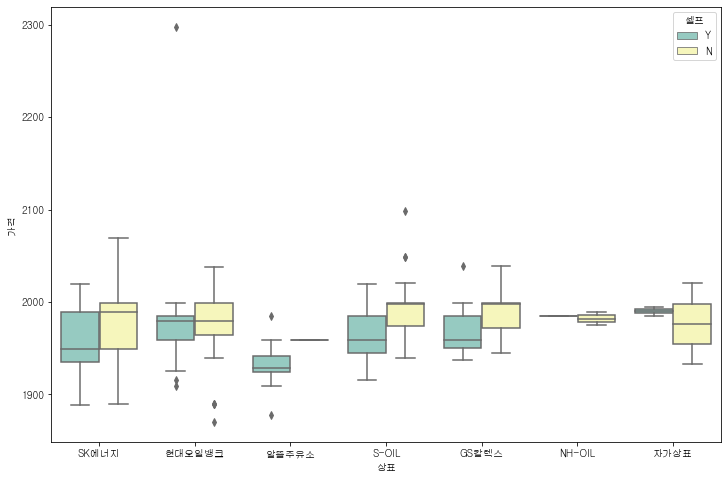

In [46]:
# 위 차트를 기준하여 광주광역시의 브랜드별 가격 출력
tmpDf=df_oil[df_oil['시도']=='광주광역시']

plt.figure(figsize=(12, 8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=tmpDf, palette='Set3')
plt.show()

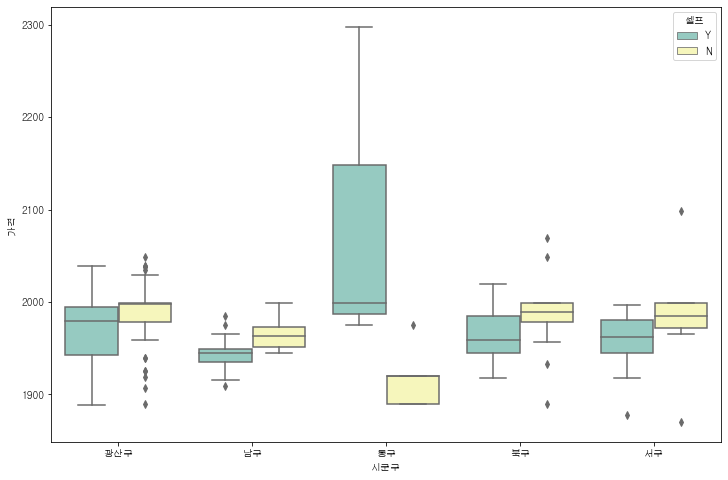

In [47]:
# 시군구에 따른 셀프/일반 휘발유 값 확인
tmpDf=df_oil[df_oil['시도']=='광주광역시']

plt.figure(figsize=(12, 8))
sns.boxplot(x='시군구', y='가격', hue='셀프', data=tmpDf, palette='Set3')
plt.show()

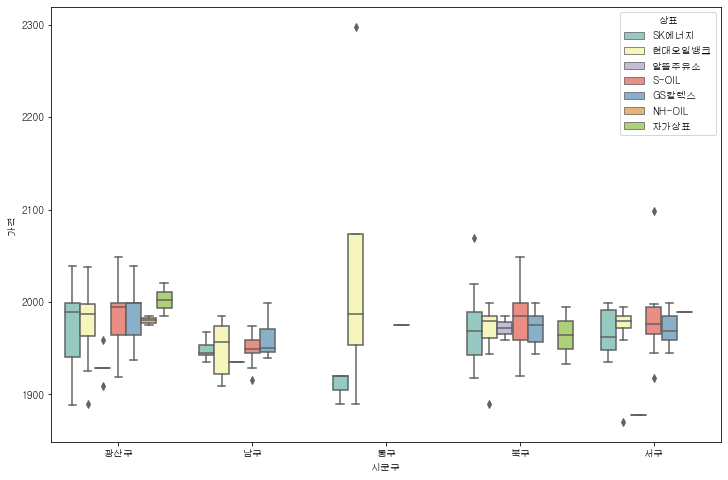

In [48]:
# 시군구에서 상표에 따른 가격
tmpDf=df_oil[df_oil['시도']=='광주광역시']

plt.figure(figsize=(12, 8))
sns.boxplot(x='시군구', y='가격', hue='상표', data=tmpDf, palette='Set3')
plt.show()

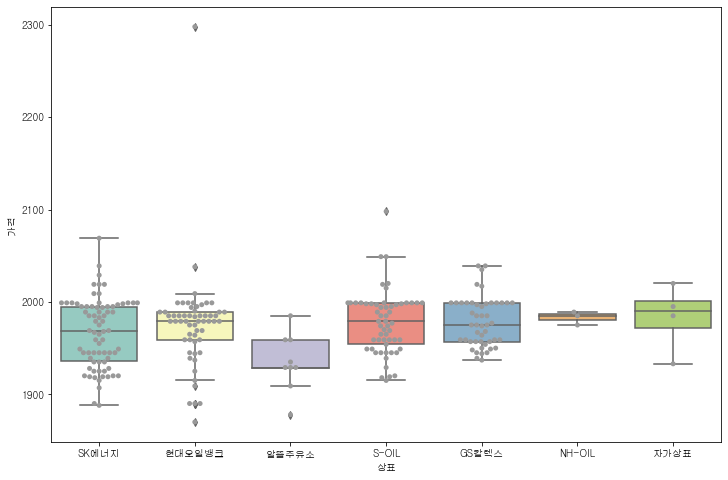

In [50]:
# 시군구에서 상표에 따른 가격
tmpDf=df_oil[df_oil['시도']=='광주광역시']

plt.figure(figsize=(12, 8))
sns.boxplot(x='상표', y='가격', data=tmpDf, palette='Set3')
sns.swarmplot(x='상표', y='가격', data=tmpDf, color='.6')
plt.show()